In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
import librosa
import glob
import json
import os
from tqdm import tqdm

In [14]:
dirs = [ f.name for f in os.scandir('/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/l2_new/') if f.is_dir() ]
delete_from_list = ['hindi', 'chinese', 'spanish', 'vietnamese', 'korean', 'arabic', 'meta']
dirs = [_dir for _dir in dirs if _dir not in delete_from_list]
print(len(dirs), dirs)

24 ['THV', 'YKWK', 'ERMS', 'BWC', 'ASI', 'YDCK', 'TNI', 'YBAA', 'TXHC', 'ZHAA', 'LXC', 'MBMPS', 'RRBI', 'NCC', 'HJK', 'HKK', 'TLV', 'ABA', 'SVBI', 'EBVS', 'HQTV', 'NJS', 'SKA', 'PNV']


In [4]:
accent_map = {"ABA":"Arabic",
              "SKA":"Arabic",
              "YBAA":"Arabic",
              "ZHAA":"Arabic",
              "BWC":"Chinese",
              "LXC":"Chinese",
              "NCC":"Chinese",
              "TXHC":"Chinese",
              "ASI":"Hindi",
              "RRBI":"Hindi",
              "SVBI":"Hindi",
              "TNI":"Hindi",
              "HJK":"Korean",
              "HKK":"Korean",
              "YDCK":"Korean",
              "YKWK":"Korean",
              "EBVS":"Spanish",
              "ERMS":"Spanish",
              "MBMPS":"Spanish",
              "NJS":"Spanish",
              "HQTV":"Vietnamese",
              "PNV":"Vietnamese",
              "THV":"Vietnamese",
              "TLV":"Vietnamese"}

In [17]:
base_dir = '/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/l2_new/'

for _dir in tqdm(dirs):
    json_data = base_dir + _dir + '/manifests'
    os.makedirs(json_data, exist_ok=True)
    files = os.listdir(base_dir + f'{_dir}/wav/') 
    with open(json_data+'/all.json', 'w') as jd:
        for file in files:
            try:
                transcript_file =  base_dir + f"{_dir}/transcript/{file.replace('wav', 'txt')}"
                wav_file = base_dir + f'{_dir}/wav/{file}'
                temp = ''
                with open(transcript_file, 'r') as f:
                    temp = f.readlines()
                transcript = ' '.join(temp)
                duration = librosa.get_duration(filename=wav_file)
                json_item = {'text': transcript, 'duration': duration, 'audio_filepath': wav_file}
                json.dump(json_item, jd)
                jd.write('\n')
            except:
                pass

100%|██████████| 24/24 [00:04<00:00,  5.05it/s]


In [20]:
base_dir = '/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/l2_new/ABA/manifests/all.json'
with open(base_dir, 'r') as f:
    items = f.readlines()
print(len(items))

1129


In [21]:
print(items[0])

{"text": "For the first time in his life he was yearning for a scrap", "duration": 3.9947845804988664, "audio_filepath": "/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/l2_new/ABA/wav/arctic_a0176.wav"}



In [22]:
json.loads(items[-1])

{'text': 'But such divergence of opinion would constitute no menace to society',
 'duration': 5.331315192743764,
 'audio_filepath': '/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/l2_new/ABA/wav/arctic_b0465.wav'}

In [23]:
import random
random.seed(42)

base_dir = '/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/l2_new/'

def _write(manifests_path, items, file):
    with open(manifests_path+file, 'w') as f:
        for item in items:
            json.dump(item, f)
            f.write('\n')

for _dir in tqdm(dirs):
    manifests_path = base_dir + _dir + '/manifests/'
    with open(manifests_path+'all.json', 'r') as jd:
        files = jd.readlines()
        files = [json.loads(file) for file in files]
        random.shuffle(files)
        
        seed_selection = files[: int(len(files)*(.7))]
        dev_test = files[int(len(files)*(.7)):]
        
        seed = seed_selection[:50]
        selection = seed_selection[50:]
        dev = dev_test[:int(len(dev_test)*(.1))]
        test = dev_test[int(len(dev_test)*(.1)):]
        print("total, seed, selection, dev, test")
        print(list(map(len, [files, seed, selection, dev, test])))
        _write(manifests_path, seed, 'seed.json')
        _write(manifests_path, test, 'test.json')
        _write(manifests_path, dev, 'dev.json')
        _write(manifests_path, selection, 'selection.json')

 25%|██▌       | 6/24 [00:00<00:00, 51.64it/s]

total, seed, selection, dev, test
[1132, 50, 742, 34, 306]
total, seed, selection, dev, test
[1131, 50, 741, 34, 306]
total, seed, selection, dev, test
[1132, 50, 742, 34, 306]
total, seed, selection, dev, test
[1130, 50, 741, 33, 306]
total, seed, selection, dev, test
[1131, 50, 741, 34, 306]
total, seed, selection, dev, test
[1131, 50, 741, 34, 306]
total, seed, selection, dev, test
[1131, 50, 741, 34, 306]
total, seed, selection, dev, test
[1130, 50, 741, 33, 306]
total, seed, selection, dev, test
[1132, 50, 742, 34, 306]
total, seed, selection, dev, test
[1132, 50, 742, 34, 306]
total, seed, selection, dev, test
[1131, 50, 741, 34, 306]


 75%|███████▌  | 18/24 [00:00<00:00, 52.15it/s]

total, seed, selection, dev, test
[1132, 50, 742, 34, 306]
total, seed, selection, dev, test
[1130, 50, 741, 33, 306]
total, seed, selection, dev, test
[1131, 50, 741, 34, 306]
total, seed, selection, dev, test
[1131, 50, 741, 34, 306]
total, seed, selection, dev, test
[1131, 50, 741, 34, 306]
total, seed, selection, dev, test
[1132, 50, 742, 34, 306]
total, seed, selection, dev, test
[1129, 50, 740, 33, 306]
total, seed, selection, dev, test
[1132, 50, 742, 34, 306]
total, seed, selection, dev, test
[1007, 50, 654, 30, 273]
total, seed, selection, dev, test
[1132, 50, 742, 34, 306]
total, seed, selection, dev, test
[1131, 50, 741, 34, 306]


100%|██████████| 24/24 [00:00<00:00, 52.90it/s]

total, seed, selection, dev, test
[974, 50, 631, 29, 264]
total, seed, selection, dev, test
[1132, 50, 742, 34, 306]


In [17]:
import random

base_dir = '/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/l2_new/'

accent_dur, accent_len = {}, {}
for _dir in tqdm(dirs):
    manifests_path = base_dir + _dir + '/manifests/'
    all_file_path = base_dir + _dir + '/manifests/all.json'
    all_list = [json.loads(line.strip()) for line in open(all_file_path)]
    duration = sum([item['duration'] for item in all_list])
    accent = accent_map[_dir]
    accent_dur[accent] = accent_dur.get(accent, 0) + duration
    accent_len[accent] = accent_len.get(accent, 0) + len(all_list)
for accent, _ in accent_dur.items():
    print(accent, accent_dur[accent]/accent_len[accent])
    

100%|██████████| 24/24 [00:00<00:00, 222.72it/s]

Vietnamese 3.8165772707787475
Korean 3.618473843707836
Spanish 3.835838337758242
Chinese 3.8094979008402645
Hindi 3.0742581916350398
Arabic 3.616638084328804


In [27]:
base_dir = '/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/l2_new/ABA/manifests/seed.json'
temp = open(base_dir)
temp = [json.loads(line.strip()) for line in temp]

In [28]:
temp[0]

{'text': 'I was near the cabin and saw you',
 'duration': 2.5588208616780044,
 'audio_filepath': '/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/l2_new/ABA/wav/arctic_a0167.wav'}

In [5]:
import numpy as np
import pickle
import json
import torch
import statistics
from tqdm import tqdm
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T

mfcc_transform = T.MFCC(
    sample_rate=22050,
    n_mfcc=39,
    melkwargs={
      'n_fft': 2048,
      'n_mels': 256,
      'hop_length': 512,
      'mel_scale': 'htk',
    }
)
base_dir = '/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/CMU_expts/accent/'
wav_file='/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/data/indicTTS_audio/indicTTS/rajasthani_male_english/english/wav/d0371.wav'

In [4]:
def extract_features(file_list, file_dir):
    with open(file_dir.replace('.json', '_39.file'), 'wb') as f:
        for file in tqdm(file_list):
            waveform, sample_rate = torchaudio.load(file['audio_filepath'])
            mfcc_features = mfcc_transform(waveform).mean(2).detach().numpy()
#             print(mfcc_features.shape)
            pickle.dump(mfcc_features, f)
dirs = [ f.name for f in os.scandir('/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/CMU_expts/accent/') if f.is_dir() and '.' not in f.name]


In [6]:
for _dir in tqdm(dirs):
    manifests_path = base_dir + _dir + '/manifests/'
    print('_'*20)
    print(_dir)

    seed_file_dir = manifests_path + 'seed.json'
    seed_file = open(seed_file_dir)
    seed_list = [json.loads(line.strip()) for line in seed_file]

    selection_file_dir = manifests_path + 'selection.json'
    selection_file = open(selection_file_dir)
    selection_list = [json.loads(line.strip()) for line in selection_file]

    test_file_dir = manifests_path + 'test.json'
    test_file = open(test_file_dir)
    test_list = [json.loads(line.strip()) for line in test_file]

    print('seed_file_starting')
    print(seed_file_dir)
    extract_features(seed_list, seed_file_dir)
    print(len(seed_list))
    print('seed_file_ending ...\n')
    
    print('selection_file_starting')
    extract_features(selection_list, selection_file_dir)
    print(len(selection_list))
    print('selection_file_ending ...\n\n')
    
    print('test_file_starting')
    extract_features(test_list, test_file_dir)
    print(len(test_list))
    print('test_file_ending ...\n\n')

  7%|▋         | 14/200 [00:00<00:01, 131.56it/s]

____________________
hindi
seed_file_starting
/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/CMU_expts/accent/hindi/manifests/seed.json
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 21%|██        | 42/200 [00:00<00:01, 133.92it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 34%|███▎      | 67/200 [00:00<00:01, 127.34it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 46%|████▌     | 92/200 [00:00<00:00, 126.19it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 60%|██████    | 120/200 [00:00<00:00, 129.40it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 74%|███████▍  | 149/200 [00:01<00:00, 130.36it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 88%|████████▊ | 176/200 [00:01<00:00, 130.77it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



100%|██████████| 200/200 [00:01<00:00, 129.81it/s]


(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



  0%|          | 11/2965 [00:00<00:28, 104.36it/s]

200
seed_file_ending ...

selection_file_starting
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



  1%|          | 37/2965 [00:00<00:25, 113.65it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



  2%|▏         | 63/2965 [00:00<00:24, 119.58it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



  3%|▎         | 91/2965 [00:00<00:22, 125.38it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



  4%|▍         | 118/2965 [00:00<00:22, 123.94it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



  5%|▍         | 145/2965 [00:01<00:22, 127.95it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



  6%|▌         | 172/2965 [00:01<00:22, 124.74it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



  7%|▋         | 200/2965 [00:01<00:21, 129.42it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



  8%|▊         | 228/2965 [00:01<00:21, 126.42it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



  9%|▊         | 258/2965 [00:02<00:20, 134.89it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 10%|▉         | 287/2965 [00:02<00:19, 135.70it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 11%|█         | 315/2965 [00:02<00:19, 132.92it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 12%|█▏        | 343/2965 [00:02<00:19, 133.84it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 12%|█▏        | 357/2965 [00:02<00:19, 132.32it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 13%|█▎        | 389/2965 [00:02<00:18, 141.08it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 14%|█▍        | 419/2965 [00:03<00:18, 135.28it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 15%|█▌        | 448/2965 [00:03<00:18, 136.85it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 16%|█▌        | 478/2965 [00:03<00:18, 135.98it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 17%|█▋        | 505/2965 [00:03<00:20, 118.16it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 17%|█▋        | 518/2965 [00:04<00:21, 116.32it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 18%|█▊        | 546/2965 [00:04<00:19, 125.01it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 19%|█▉        | 576/2965 [00:04<00:17, 134.23it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 20%|██        | 605/2965 [00:04<00:17, 137.34it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 21%|██▏       | 633/2965 [00:04<00:18, 128.24it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 22%|██▏       | 662/2965 [00:05<00:16, 135.87it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 23%|██▎       | 691/2965 [00:05<00:16, 138.92it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 24%|██▍       | 723/2965 [00:05<00:16, 135.58it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 25%|██▌       | 751/2965 [00:05<00:16, 130.42it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 26%|██▋       | 779/2965 [00:05<00:16, 129.67it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 27%|██▋       | 793/2965 [00:06<00:16, 131.09it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 28%|██▊       | 821/2965 [00:06<00:16, 128.96it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 29%|██▊       | 847/2965 [00:06<00:16, 126.90it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 29%|██▉       | 873/2965 [00:06<00:16, 123.83it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 30%|███       | 902/2965 [00:06<00:16, 125.20it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 31%|███▏      | 929/2965 [00:07<00:16, 126.88it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 32%|███▏      | 955/2965 [00:07<00:16, 119.66it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 33%|███▎      | 983/2965 [00:07<00:15, 125.68it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 34%|███▍      | 1011/2965 [00:07<00:14, 131.01it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 35%|███▍      | 1025/2965 [00:07<00:15, 127.13it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 35%|███▌      | 1051/2965 [00:08<00:15, 123.90it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 36%|███▋      | 1081/2965 [00:08<00:14, 132.50it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 37%|███▋      | 1108/2965 [00:08<00:15, 122.86it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 38%|███▊      | 1137/2965 [00:08<00:13, 130.87it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 39%|███▉      | 1164/2965 [00:09<00:15, 118.67it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 40%|███▉      | 1178/2965 [00:09<00:14, 124.21it/s]


(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)


 41%|████      | 1208/2965 [00:09<00:13, 125.88it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 42%|████▏     | 1235/2965 [00:09<00:14, 121.07it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 43%|████▎     | 1265/2965 [00:09<00:12, 130.90it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 44%|████▎     | 1292/2965 [00:10<00:13, 121.67it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 45%|████▍     | 1322/2965 [00:10<00:12, 131.60it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 45%|████▌     | 1336/2965 [00:10<00:12, 131.07it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 46%|████▌     | 1363/2965 [00:10<00:12, 124.49it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 47%|████▋     | 1390/2965 [00:10<00:12, 125.17it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 48%|████▊     | 1418/2965 [00:11<00:12, 126.54it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 49%|████▊     | 1444/2965 [00:11<00:12, 120.62it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 50%|████▉     | 1474/2965 [00:11<00:11, 131.91it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 51%|█████     | 1506/2965 [00:11<00:10, 134.27it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 52%|█████▏    | 1537/2965 [00:11<00:10, 142.13it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 53%|█████▎    | 1569/2965 [00:12<00:09, 147.82it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 54%|█████▍    | 1599/2965 [00:12<00:09, 140.19it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 54%|█████▍    | 1615/2965 [00:12<00:09, 144.40it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 56%|█████▌    | 1646/2965 [00:12<00:09, 143.31it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 57%|█████▋    | 1676/2965 [00:12<00:09, 143.16it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 58%|█████▊    | 1706/2965 [00:13<00:09, 138.24it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 59%|█████▊    | 1736/2965 [00:13<00:08, 139.34it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 60%|█████▉    | 1766/2965 [00:13<00:08, 139.87it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 60%|██████    | 1781/2965 [00:13<00:08, 137.76it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 61%|██████▏   | 1819/2965 [00:14<00:12, 90.28it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 62%|██████▏   | 1844/2965 [00:14<00:20, 55.81it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 63%|██████▎   | 1871/2965 [00:15<00:13, 79.55it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 64%|██████▍   | 1898/2965 [00:15<00:10, 100.69it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 65%|██████▍   | 1923/2965 [00:15<00:09, 104.48it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 66%|██████▌   | 1947/2965 [00:15<00:09, 107.96it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 67%|██████▋   | 1974/2965 [00:15<00:08, 116.98it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 67%|██████▋   | 2000/2965 [00:16<00:07, 120.97it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 68%|██████▊   | 2026/2965 [00:16<00:07, 123.05it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 69%|██████▉   | 2052/2965 [00:16<00:07, 119.97it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 70%|███████   | 2079/2965 [00:16<00:07, 123.43it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 71%|███████   | 2105/2965 [00:17<00:06, 124.50it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 72%|███████▏  | 2132/2965 [00:17<00:06, 126.24it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 73%|███████▎  | 2161/2965 [00:17<00:06, 130.93it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 74%|███████▍  | 2190/2965 [00:17<00:05, 135.67it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 74%|███████▍  | 2204/2965 [00:17<00:05, 132.28it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 75%|███████▌  | 2232/2965 [00:17<00:05, 130.06it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 76%|███████▋  | 2261/2965 [00:18<00:05, 128.59it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 77%|███████▋  | 2290/2965 [00:18<00:05, 127.50it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 78%|███████▊  | 2319/2965 [00:18<00:04, 129.82it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 79%|███████▉  | 2346/2965 [00:18<00:04, 124.25it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 80%|███████▉  | 2359/2965 [00:18<00:04, 125.20it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 80%|████████  | 2384/2965 [00:19<00:05, 113.77it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 81%|████████  | 2408/2965 [00:19<00:05, 109.07it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 82%|████████▏ | 2437/2965 [00:19<00:04, 123.99it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 83%|████████▎ | 2464/2965 [00:19<00:03, 127.14it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 84%|████████▍ | 2490/2965 [00:20<00:03, 121.77it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 85%|████████▍ | 2518/2965 [00:20<00:03, 126.77it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 86%|████████▌ | 2548/2965 [00:20<00:03, 127.34it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 87%|████████▋ | 2578/2965 [00:20<00:02, 133.44it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 88%|████████▊ | 2607/2965 [00:20<00:02, 134.94it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 88%|████████▊ | 2621/2965 [00:21<00:02, 131.77it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 89%|████████▉ | 2649/2965 [00:21<00:02, 130.76it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 90%|█████████ | 2677/2965 [00:21<00:02, 131.71it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 91%|█████████▏| 2706/2965 [00:21<00:02, 127.30it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 92%|█████████▏| 2737/2965 [00:21<00:01, 137.11it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 93%|█████████▎| 2766/2965 [00:22<00:01, 138.58it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 94%|█████████▍| 2795/2965 [00:22<00:01, 139.93it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 95%|█████████▌| 2825/2965 [00:22<00:00, 140.75it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 96%|█████████▋| 2855/2965 [00:22<00:00, 137.44it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 97%|█████████▋| 2887/2965 [00:22<00:00, 145.22it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 98%|█████████▊| 2918/2965 [00:23<00:00, 147.19it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 99%|█████████▉| 2948/2965 [00:23<00:00, 143.78it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



100%|██████████| 2965/2965 [00:23<00:00, 126.07it/s]


(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



  1%|          | 13/1224 [00:00<00:09, 124.68it/s]

2965
selection_file_ending ...


test_file_starting
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



  3%|▎         | 38/1224 [00:00<00:09, 122.69it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



  5%|▌         | 64/1224 [00:00<00:09, 123.87it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



  7%|▋         | 88/1224 [00:00<00:09, 121.21it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



  9%|▉         | 112/1224 [00:00<00:09, 114.30it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 11%|█▏        | 138/1224 [00:01<00:09, 108.68it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 13%|█▎        | 162/1224 [00:01<00:10, 106.05it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 15%|█▌        | 187/1224 [00:01<00:09, 112.37it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 17%|█▋        | 212/1224 [00:01<00:08, 115.71it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 18%|█▊        | 226/1224 [00:01<00:08, 120.58it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 21%|██        | 252/1224 [00:02<00:08, 117.37it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 23%|██▎       | 277/1224 [00:02<00:08, 117.09it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 25%|██▍       | 305/1224 [00:02<00:07, 123.52it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 27%|██▋       | 331/1224 [00:02<00:07, 123.33it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 29%|██▉       | 358/1224 [00:03<00:06, 127.61it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 31%|███▏      | 384/1224 [00:03<00:06, 128.78it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 33%|███▎      | 410/1224 [00:03<00:06, 127.12it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 36%|███▌      | 436/1224 [00:03<00:06, 116.27it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 38%|███▊      | 462/1224 [00:03<00:06, 115.48it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 40%|███▉      | 487/1224 [00:04<00:06, 120.22it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 41%|████      | 501/1224 [00:04<00:05, 124.07it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 43%|████▎     | 528/1224 [00:04<00:06, 115.11it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 45%|████▌     | 553/1224 [00:04<00:05, 118.20it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 47%|████▋     | 579/1224 [00:04<00:05, 116.21it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 49%|████▉     | 605/1224 [00:05<00:05, 113.82it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 52%|█████▏    | 632/1224 [00:05<00:05, 116.67it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 54%|█████▍    | 659/1224 [00:05<00:04, 118.35it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 56%|█████▌    | 687/1224 [00:05<00:04, 125.69it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 57%|█████▋    | 701/1224 [00:05<00:04, 128.68it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 60%|█████▉    | 730/1224 [00:06<00:03, 132.07it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 62%|██████▏   | 762/1224 [00:06<00:03, 140.51it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 65%|██████▍   | 791/1224 [00:06<00:03, 136.33it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 67%|██████▋   | 819/1224 [00:06<00:03, 130.02it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 69%|██████▉   | 847/1224 [00:06<00:02, 134.15it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 71%|███████▏  | 874/1224 [00:07<00:02, 119.43it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 72%|███████▏  | 887/1224 [00:08<00:08, 41.70it/s] 

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 73%|███████▎  | 897/1224 [00:09<00:22, 14.49it/s]

(1, 39)
(1, 39)



 74%|███████▍  | 904/1224 [00:10<00:30, 10.61it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 75%|███████▌  | 924/1224 [00:11<00:15, 19.47it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 76%|███████▋  | 935/1224 [00:11<00:11, 25.64it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 79%|███████▊  | 963/1224 [00:11<00:05, 43.50it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 81%|████████  | 992/1224 [00:11<00:03, 66.14it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 83%|████████▎ | 1019/1224 [00:11<00:02, 78.99it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 85%|████████▌ | 1045/1224 [00:12<00:01, 97.43it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 88%|████████▊ | 1071/1224 [00:12<00:02, 62.55it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 88%|████████▊ | 1082/1224 [00:13<00:02, 49.40it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 89%|████████▉ | 1091/1224 [00:14<00:07, 17.30it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 90%|████████▉ | 1097/1224 [00:15<00:12, 10.33it/s]

(1, 39)
(1, 39)



 91%|█████████ | 1115/1224 [00:16<00:09, 11.63it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 93%|█████████▎| 1138/1224 [00:16<00:04, 21.37it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 95%|█████████▍| 1162/1224 [00:16<00:01, 36.60it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 97%|█████████▋| 1186/1224 [00:17<00:00, 56.19it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)



 99%|█████████▉| 1215/1224 [00:17<00:00, 80.59it/s]

(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)


100%|██████████| 1224/1224 [00:17<00:00, 70.67it/s]


(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)
(1, 39)


100%|██████████| 1/1 [00:42<00:00, 42.82s/it]

1224
test_file_ending ...




In [40]:
import pickle 
import numpy as np

def load_features(file_dir):
    features = []
    with open(file_dir.replace('.json', '_39.file'), 'rb') as f:
        while True:
            try:
                features.append(pickle.load(f))
            except EOFError:
                break
    features = np.concatenate(features, axis=0)
    return features

# dirs = ['ABA', 'SKA', 'YBAA', 'BWC', 'NCC', 'TXHC', 'ASI', 'RRBI', 'SVBI'] # First 3 arabic, then 3 chinese, 
# # 3 hindi
# dirs = ['ABA', 'SKA', 'BWC', 'NCC', 'ASI', 'RRBI'] 
base_dir = '/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/l2_new/'

ground_list, ground_list_Y, ground_features = [], [], []
for i, _dir in enumerate(dirs):
    selection_file_path = base_dir + _dir + '/manifests/selection.json'
    selection_file_list = [json.loads(line.strip()) for line in open(selection_file_path)]
    selection_file_list = selection_file_list
    ground_list.extend(selection_file_list)
    ground_features.append(load_features(selection_file_path))
    ground_list_Y.extend([i]*len(selection_file_list))
    
ground_features = np.concatenate(ground_features, axis=0)
ground_features_Y = np.asarray(ground_list_Y).reshape(-1, 1) 
print(len(ground_list), ground_features.shape, ground_features_Y.shape)

17595 (17595, 39) (17595, 1)


In [33]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

def _color_map(dirs):
#     color = ["midnightblue", "royalblue", "indigo", "darkgreen", 'lime', "green", 'pink', 'fuchsia', 'red', 
#              'yellow', 'black']
    color = ["midnightblue", "royalblue", "darkgreen", 'lime', 'pink', 'red', 
             'yellow', 'black']
    color_map = {}
    for _dir, color in zip(dirs+['query_set', 'selected_set'], color):
        color_map[_dir] = color
    return color_map

In [46]:
# color = ["cyan", "royalblue", "lightcoral", "yellowgreen", 'lawngreen', "green", 'pink', 'fuchsia', 'red', 
#              'yellow', 'black']
# color_map = {}
# for _dir, color in zip(dirs+['query_set', 'selected_set'], color):
#     color_map[_dir] = color
# print(color_map)

In [42]:
X, y = ground_features, ground_features_Y

print(X.shape, y.shape)
feat_cols = ['dim'+str(i) for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feat_cols)
df['y'] = y

label_map = dict(enumerate(dirs))
df['label'] = df['y'].apply(lambda i: label_map[i]+" ("+accent_map[label_map[i]]+")")

(17595, 39) (17595, 1)


In [43]:
tsne = TSNE(n_components=2, verbose=1, perplexity=60, n_iter=1000)
tsne_results = tsne.fit_transform(df[feat_cols].values)

df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 17595 samples in 0.002s...
[t-SNE] Computed neighbors for 17595 samples in 9.815s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17595
[t-SNE] Computed conditional probabilities for sample 2000 / 17595
[t-SNE] Computed conditional probabilities for sample 3000 / 17595
[t-SNE] Computed conditional probabilities for sample 4000 / 17595
[t-SNE] Computed conditional probabilities for sample 5000 / 17595
[t-SNE] Computed conditional probabilities for sample 6000 / 17595
[t-SNE] Computed conditional probabilities for sample 7000 / 17595
[t-SNE] Computed conditional probabilities for sample 8000 / 17595
[t-SNE] Computed conditional probabilities for sample 9000 / 17595
[t-SNE] Computed conditional probabilities for sample 10000 / 17595
[t-SNE] Computed conditional probabilities for sample 11000 / 17595
[t-SNE] Computed conditional probabilities for sample 12000 / 17595
[t-SNE] Computed conditional probabilities for sa

Text(0.5, 0.98, 'plot')

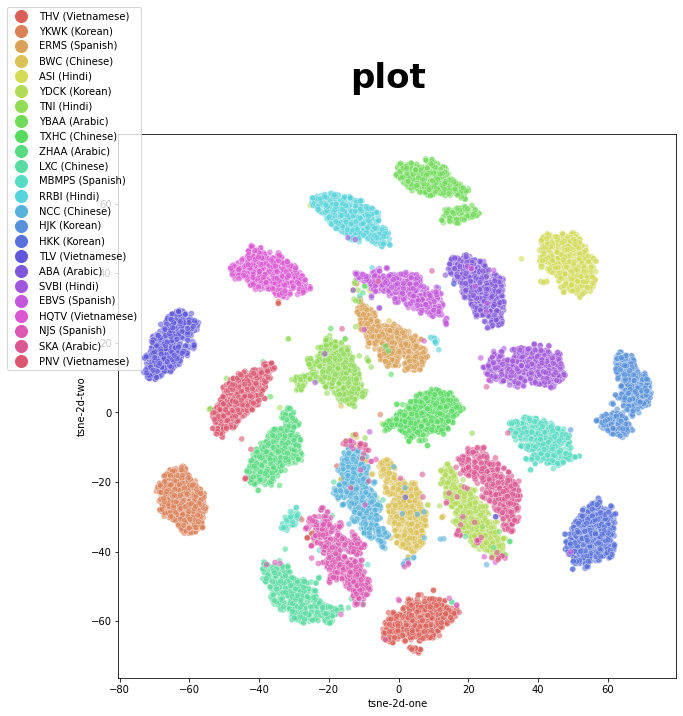

In [47]:
fig = plt.figure(figsize=(10, 10))
_ax = fig.add_subplot(1,1,1)

g = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", len(dirs)),
    data=df,
    legend="full",
    alpha=0.6,
    ax = _ax
)
g.legend(loc='center right', bbox_to_anchor=(0.05, 0.9), prop={'size':10}, markerscale=2)
fig.suptitle('plot', fontsize=34, fontweight='bold')

In [82]:
import random
import statistics

budget_size = 100
list_total_duration = []
for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    temp_ground_list = ground_list[:]
    random.seed(41 + i)
    random.shuffle(temp_ground_list)
    selected_list = temp_ground_list[:budget_size]     
    total_duration = sum([i['duration'] for i in selected_list])
    list_total_duration.append(total_duration)
print(list_total_duration)
print(statistics.mean(list_total_duration), statistics.variance(list_total_duration))

[405.16151927437636, 416.2097505668934, 369.02471655328793, 404.9663492063492, 373.54430839002254, 392.39437641723345, 394.63179138322005, 372.87029478458066, 398.2815873015873, 378.779433106576]
390.5864126984127 262.5807715346997


In [ ]:
|ABA|M|Arabic|1129|150|
|SKA|F|Arabic|974|150|
|YBAA|M|Arabic|1130|149|
|ZHAA|F|Arabic|1132|150|
|BWC|M|Chinese|1130|150|
|LXC|F|Chinese|1131|150|
|NCC|F|Chinese|1131|150|
|TXHC|M|Chinese|1132|150|
|ASI|M|Hindi|1131|150|
|RRBI|M|Hindi|1130|150|
|SVBI|F|Hindi|1132|150|
|TNI|F|Hindi|1131|150|
|HJK|F|Korean|1131|150|
|HKK|M|Korean|1131|150|
|YDCK|F|Korean|1131|150|
|YKWK|M|Korean|1131|150|
|EBVS|M|Spanish|1007|150|
|ERMS|M|Spanish|1132|150|
|MBMPS|F|Spanish|1132|150|
|NJS|F|Spanish|1131|150|
|HQTV|M|Vietnamese|1132|150|
|PNV|F|Vietnamese|1132|150|
|THV|F|Vietnamese|1132|150|
|TLV|M|Vietnamese|1132|150|

In [ ]:
# import random
# random.seed(42)

# base_dir = '/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/l2_new/'

# def _write(manifests_path, items, file):
#     with open(manifests_path+file, 'w') as f:
#         for item in items:
#             json.dump(item, f)
#             f.write('\n')

# def get_duration(file_list):
#     duration = sum([item['duration'] for item in file_list])
#     return duration
            
# def get_index(list_samples, frac):
#     duration = get_duration(list_samples)
#     so_far_dur, index = 0, 0
#     while so_far_dur + list_samples[index]['duration'] <= duration*(frac):
#         so_far_dur, index = list_samples[index]['duration'] + so_far_dur, index + 1
#     return index
        
# for _dir in tqdm(dirs):
#     all_path = base_dir + _dir + '/manifests/all.json'
#     list_all = [json.loads(line.strip()) for line in open(all_path)]
#     random.shuffle(list_all)
#     index = get_index(all_file, .7)
#     seed_selection_files = all_file[:index]
#     dev_test_files = all_file[index:]
#     index = get_index(dev_test_files, .1)
#     list_dev = dev_test_files[:index]
#     list_test = dev_test_files[index:]
#     list_universal_seed = 
    
    
#     with open(manifests_path+'all.json', 'r') as jd:
#         files = jd.readlines()
#         files = [json.loads(file) for file in files]
#         random.shuffle(files)
        
#         seed_selection = files[: int(len(files)*(.7))]
#         dev_test = files[int(len(files)*(.7)):]
        
#         seed = seed_selection[:50]
#         selection = seed_selection[50:]
#         dev = dev_test[:int(len(dev_test)*(.1))]
#         test = dev_test[int(len(dev_test)*(.1)):]
#         print("total, seed, selection, dev, test")
#         print(list(map(len, [files, seed, selection, dev, test])))
#         _write(manifests_path, seed, 'seed.json')
#         _write(manifests_path, test, 'test.json')
#         _write(manifests_path, dev, 'dev.json')
#         _write(manifests_path, selection, 'selection.json')

In [26]:
accent_dirs = ['hindi', 'chinese', 'spanish', 'vietnamese', 'korean', 'arabic']
base_dir = '/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/l2_new/'

def _write(manifests_path, items, file):
    with open(manifests_path+file, 'w') as f:
        for item in items:
            json.dump(item, f)
            f.write('\n')
            
random.seed(42)

for accent in accent_dirs:
    list_seed, list_selection, list_dev, list_test = [], [], [], []
    manifests_path = base_dir + accent + '/manifests/'
    os.makedirs(manifests_path, exist_ok=True)
    for spkr, accnt in accent_map.items():
        if accnt.lower() == accent:
            seed_path = base_dir + spkr + '/manifests/seed.json'
            list_seed.extend([json.loads(line.strip()) for line in open(seed_path)])   
            selection_path = base_dir + spkr + '/manifests/selection.json'
            list_selection.extend([json.loads(line.strip()) for line in open(selection_path)])
            dev_path = base_dir + spkr + '/manifests/dev.json'
            list_dev.extend([json.loads(line.strip()) for line in open(dev_path)])   
            test_path = base_dir + spkr + '/manifests/test.json'
            list_test.extend([json.loads(line.strip()) for line in open(test_path)]) 
    random.shuffle(list_seed)
    random.shuffle(list_selection)
    random.shuffle(list_test)
    random.shuffle(list_dev)
    
    _write(manifests_path, list_seed, 'seed.json')
    _write(manifests_path, list_test, 'test.json')
    _write(manifests_path, list_dev, 'dev.json')
    _write(manifests_path, list_selection, 'selection.json')
    
    print(accent, list(map(len, [list_seed, list_selection, list_dev, list_test])))

hindi [200, 2965, 135, 1224]
chinese [200, 2965, 135, 1224]
spanish [200, 2879, 132, 1191]
vietnamese [200, 2968, 136, 1224]
korean [200, 2964, 136, 1224]
arabic [200, 2854, 129, 1182]


In [27]:
import numpy as np
import pickle
import json
import torch
from tqdm import tqdm
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T

mfcc_transform = T.MFCC(
    sample_rate=22050,
    n_mfcc=39,
    melkwargs={
      'n_fft': 2048,
      'n_mels': 256,
      'hop_length': 512,
      'mel_scale': 'htk',
    }
)

accent_dirs = ['hindi', 'chinese', 'spanish', 'vietnamese', 'korean', 'arabic']
base_dir = '/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/CMU_expts/accent/'

def extract_features(file_list, file_dir):
    with open(file_dir.replace('.json', '_39.file'), 'wb') as f:
        for file in tqdm(file_list):
            waveform, sample_rate = torchaudio.load(file['audio_filepath'])
            mfcc_features = mfcc_transform(waveform).mean(2).detach().numpy()
            pickle.dump(mfcc_features, f)

for _dir in tqdm(accent_dirs):
    manifests_path = base_dir + _dir + '/manifests/'
    print('_'*20)
    print(_dir)

    seed_file_dir = manifests_path + 'seed.json'
    seed_file = open(seed_file_dir)
    seed_list = [json.loads(line.strip()) for line in seed_file]

    selection_file_dir = manifests_path + 'selection.json'
    selection_file = open(selection_file_dir)
    selection_list = [json.loads(line.strip()) for line in selection_file]

    test_file_dir = manifests_path + 'test.json'
    test_file = open(test_file_dir)
    test_list = [json.loads(line.strip()) for line in test_file]

    print('seed_file_starting')
    print(seed_file_dir)
    extract_features(seed_list, seed_file_dir)
    print(len(seed_list))
    print('seed_file_ending ...\n')
    
    print('selection_file_starting')
    extract_features(selection_list, selection_file_dir)
    print(len(selection_list))
    print('selection_file_ending ...\n\n')
    
    print('test_file_starting')
    extract_features(test_list, test_file_dir)
    print(len(test_list))
    print('test_file_ending ...\n\n')

  6%|▌         | 12/200 [00:00<00:01, 118.24it/s]

____________________
hindi
seed_file_starting
/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/CMU_expts/accent/hindi/manifests/seed.json



100%|██████████| 200/200 [00:01<00:00, 128.91it/s]

  0%|          | 13/2965 [00:00<00:22, 129.04it/s]

200
seed_file_ending ...

selection_file_starting



100%|██████████| 2965/2965 [00:22<00:00, 131.90it/s]

  1%|          | 14/1224 [00:00<00:09, 132.55it/s]

2965
selection_file_ending ...


test_file_starting



  3%|▎         | 6/200 [00:00<00:03, 54.93it/s]

1224
test_file_ending ...


____________________
chinese
seed_file_starting
/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/CMU_expts/accent/chinese/manifests/seed.json



100%|██████████| 200/200 [00:02<00:00, 96.65it/s] 

  0%|          | 13/2965 [00:00<00:23, 124.51it/s]

200
seed_file_ending ...

selection_file_starting



100%|██████████| 2965/2965 [00:25<00:00, 116.91it/s]

  1%|          | 12/1224 [00:00<00:10, 119.64it/s]

2965
selection_file_ending ...


test_file_starting



  6%|▋         | 13/200 [00:00<00:01, 128.96it/s]

1224
test_file_ending ...


____________________
spanish
seed_file_starting
/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/CMU_expts/accent/spanish/manifests/seed.json



100%|██████████| 200/200 [00:01<00:00, 121.25it/s]

  0%|          | 13/2879 [00:00<00:22, 129.73it/s]

200
seed_file_ending ...

selection_file_starting



100%|██████████| 2879/2879 [00:24<00:00, 119.84it/s]

  1%|          | 11/1191 [00:00<00:10, 107.43it/s]

2879
selection_file_ending ...


test_file_starting



  6%|▌         | 11/200 [00:00<00:01, 98.10it/s]

1191
test_file_ending ...


____________________
vietnamese
seed_file_starting
/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/CMU_expts/accent/vietnamese/manifests/seed.json



100%|██████████| 200/200 [00:01<00:00, 120.02it/s]

  0%|          | 13/2968 [00:00<00:22, 129.03it/s]

200
seed_file_ending ...

selection_file_starting



100%|██████████| 2968/2968 [00:24<00:00, 120.37it/s]

  1%|          | 15/1224 [00:00<00:08, 148.37it/s]

2968
selection_file_ending ...


test_file_starting



  8%|▊         | 15/200 [00:00<00:01, 142.61it/s]

1224
test_file_ending ...


____________________
korean
seed_file_starting
/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/CMU_expts/accent/korean/manifests/seed.json



100%|██████████| 200/200 [00:01<00:00, 126.86it/s]

  1%|          | 16/2964 [00:00<00:20, 146.82it/s]

200
seed_file_ending ...

selection_file_starting



100%|██████████| 2964/2964 [00:23<00:00, 123.72it/s]

  1%|          | 15/1224 [00:00<00:08, 149.34it/s]

2964
selection_file_ending ...


test_file_starting



  7%|▋         | 14/200 [00:00<00:01, 128.93it/s]

1224
test_file_ending ...


____________________
arabic
seed_file_starting
/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/CMU_expts/accent/arabic/manifests/seed.json



100%|██████████| 200/200 [00:01<00:00, 126.97it/s]

  1%|          | 15/2854 [00:00<00:20, 138.38it/s]

200
seed_file_ending ...

selection_file_starting



100%|██████████| 2854/2854 [00:22<00:00, 124.23it/s]

  1%|          | 14/1182 [00:00<00:08, 139.45it/s]

2854
selection_file_ending ...


test_file_starting



100%|██████████| 6/6 [03:33<00:00, 35.54s/it]

1182
test_file_ending ...




In [17]:
import statistics
import json
import random

accent_dirs = ['hindi', 'chinese', 'spanish', 'vietnamese', 'korean', 'arabic']
base_dir = '/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/CMU_expts/accent/'

list_ground = []
for accent in accent_dirs:
    path_selection = base_dir + accent + '/manifests/selection.json'
    list_selection = [json.loads(line.strip()) for line in open(path_selection)]
    list_ground.extend(list_selection)
    print(accent, len(list_selection))
print('ground', len(list_ground))

list_duration = []
for i in range(100):
    random.seed(i)
    samples = list_ground[:]
    random.shuffle(samples)
    duration = sum([item['duration'] for item in samples[:1000]])
    list_duration.append(duration)
print(f'mean {statistics.mean(list_duration)}, variance {statistics.variance(list_duration)}')

hindi 2965
chinese 2965
spanish 2879
vietnamese 2968
korean 2964
arabic 2854
ground 17595
mean 3631.5672258503405, variance 1246.311128765341


In [1]:
import numpy as np
import pickle
import json
import torch
from tqdm import tqdm
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T

mfcc_transform = T.MFCC(
    sample_rate=22050,
    n_mfcc=39,
    melkwargs={
      'n_fft': 2048,
      'n_mels': 256,
      'hop_length': 512,
      'mel_scale': 'htk',
    }
)

def extract_features(file_list):
    with open('native_39.file', 'wb') as f:
        for file in tqdm(file_list):
            waveform, sample_rate = torchaudio.load(file)
            mfcc_features = mfcc_transform(waveform).mean(2).detach().numpy()
            print(mfcc_features.shape)
            pickle.dump(mfcc_features, f)

In [5]:
native_base_dir = "/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/mozilla/cv-corpus-7.0-2021-07-21/en/clips/"
native_files = ["common_voice_en_19049392.mp3",
               "common_voice_en_19049393.mp3",
               "common_voice_en_19049395.mp3",
               "common_voice_en_19049396.mp3",
               "common_voice_en_19685806.mp3",
               "common_voice_en_19685807.mp3",
               "common_voice_en_19685808.mp3",
               "common_voice_en_19685810.mp3",
               "common_voice_en_19826558.mp3",
               "common_voice_en_19826559.mp3"]
# os.path.isdir(native_base_dir)
print([os.path.isfile(native_base_dir+file) for file in native_files])
native_speech_dir="/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/mozilla/CMU_expts/native-speech/"

[True, True, True, True, True, True, True, True, True, True]


In [6]:
from pathlib import Path
Path(native_speech_dir).mkdir(parents=True, exist_ok=True)

In [36]:
import subprocess
for file in native_files:
    path_to_file=native_base_dir+file
#     print(os.path.isdir(native_speech_dir))
#     print(native_speech_dir + file.replace('.mp3', '.wav'))
#     subprocess.call(['ffmpeg', '-i', path_to_file,
#                    native_speech_dir + file.replace('.mp3', '.wav')])

In [38]:
#needs tf kernel
wav_file_list=[]
from pydub import AudioSegment
for file in native_files:
    path_to_file=native_base_dir+file
#     print(path_to_file)
#     print(os.path.isfile(path_to_file))
    sound = AudioSegment.from_mp3(path_to_file)
    wav_file=native_speech_dir + file.replace('.mp3', '.wav')
    wav_file_list.append(wav_file)
    sound.export(wav_file, format="wav")
    print(librosa.get_duration(filename=wav_file))

4.944
5.016
3.504
6.336
5.352
5.16
5.808
4.008
6.216
5.736


In [7]:

extract_features(files, base_dir)

  0%|          | 0/10 [00:00<?, ?it/s]


RuntimeError: Error loading audio file: failed to open file common_voice_en_20872478.mp3

In [34]:
dirs = [f.name for f in os.scandir(native_speech_dir)]
print(dirs)
print(native_speech_dir)

['common_voice_en_19049392.wav', 'common_voice_en_19685808.wav', 'common_voice_en_19049396.wav', 'common_voice_en_19685810.wav', 'common_voice_en_19685806.wav', 'common_voice_en_19049395.wav', 'common_voice_en_19826559.wav', 'common_voice_en_19049393.wav', 'common_voice_en_19826558.wav', 'common_voice_en_19685807.wav']
/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/mozilla/CMU_expts/native-speech/
